# Project: Shoes Image Classification
Created by: TK Wong

## Abstract
Database from https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged<br>

This project is to classify shoes image to one of its catagory adidas, converse and nike, as maketing team want to understand what brand of shoes that people post it on their social media site and use it as redundancy wtih web crawler. If the image classification model can successfully identify three brand of shoes, other brand will added into this project. <br>
Dataset already divided into training and test set and we will use it to train and test our model. File directory is as below:<br>
- train<br>
    - adidas<br>
    - converse<br>
    - nike<br>
- test<br>
    - adidas<br>
    - converse<br>
    - nike<br>

Randomly select 4 images from each brand and print out then data augmentation will be applied to increase the number of images in each brand and print 5 random images.<br>

Total two models created and will be trained using CNN and the result will be evaluated using loss and accuracy curves for training and validation then try to improve the model by using transfer learning on <mark>Tensorflow VGG16</mark> and <mark>ResNet50</mark>, then compare the result using loss and accuracy curves for training and validation. At last, we will use image from Google to test the model and see how well it can classify the image. <mark>VGG16</mark> model will be used to classify the image because it has better accuracy and took less time to train.<br>

Refence: https://github.com/features/copilot

## Preprocessing
Import all the necessary libraries, set the file path and read the data. And then print out random images from each brand to see how the data look like.


In [1]:
# import library
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import random
import os
import seaborn as sns

In [2]:
# contain image that will be use on learning
train_dir = '../Shoes_classification_Nike_Adidas_Converse/Dataset/train/'
test_dir = '../Shoes_classification_Nike_Adidas_Converse/Dataset/test/'

adidas = os.listdir(train_dir + 'adidas')
nike = os.listdir(train_dir + 'nike')
conv = os.listdir(train_dir + 'converse')

train_class = os.listdir(train_dir)
test_class = os.listdir(test_dir)

print(train_class)
print(test_class)

['adidas', 'converse', 'nike']
['adidas', 'converse', 'nike']


In [3]:
# show number of image in folder
# use "f" in front of a string, all variables inside curly brackets are read and replaced by there value
for dirpath, dirname, filenames in os.walk('/Dataset/'):
    print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

Have 3 directires in test folders (adidas, converse, nike) and each folders contain 38 images. Total 114 images<p>
Have 3 directires in train folders (adidas, converse, nike) and each folders contain 237 images. Total 711 images.<p>
Image pixel is 240x240. And has dimension of (240, 240, 3),  3 channel becuase the image is colored<p>


### Print out random images from each brand
For image classifacation, convolutional neural networks (CNN), using Tensorflow to develop image classifies. Some of the image can clearly see the brand icon and some not. Some of the image show people wearing shoes, object detection and segmentation need to apply on the image. <br>
Because the amunt of images is small, overfit problem might happen, data augmentation could use to solve this problem.

#### Nike

In [4]:
# get random image in test/nike folder
def get_random_image(target_dir='Dataset/test/nike'):
  # setting up the image directory
  target_folder = target_dir

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  # turn of axis line
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)


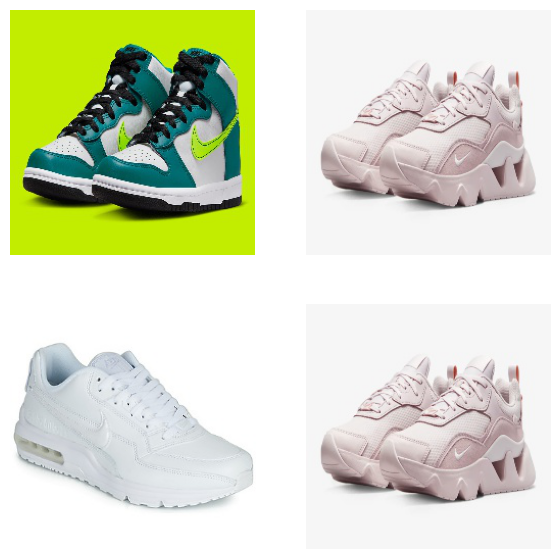

In [5]:
plt.figure(figsize=(7, 7))
plt.subplot(2,2,1)
img = get_random_image()
plt.subplot(2,2,2)
img = get_random_image()
plt.subplot(2,2,3)
img = get_random_image()
plt.subplot(2,2,4)
img = get_random_image()

#### Adidas

In [6]:
# get random image in test/adidas folder
def get_random_image(target_dir='Dataset/test/adidas'):
  # setting up the image directory
  target_folder = target_dir

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  # turn of axis line
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)


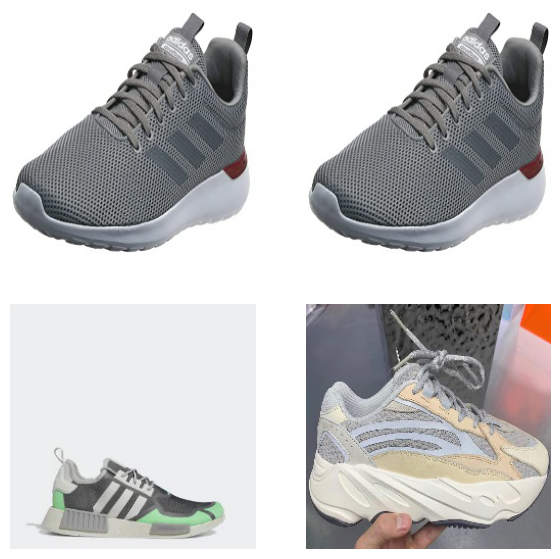

In [7]:
plt.figure(figsize=(7, 7))
plt.subplot(2,2,1)
img = get_random_image()
plt.subplot(2,2,2)
img = get_random_image()
plt.subplot(2,2,3)
img = get_random_image()
plt.subplot(2,2,4)
img = get_random_image()

#### Converse

In [8]:
# get random image in test/converse folder
def get_random_image(target_dir='Dataset/test/converse'):
  # setting up the image directory
  target_folder = target_dir

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  # turn of axis line
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)


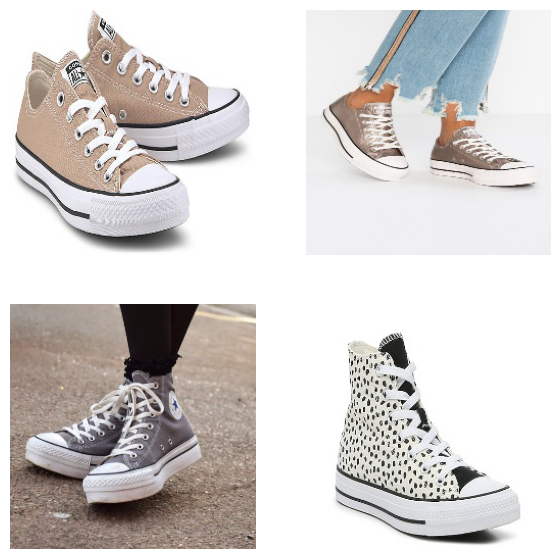

In [9]:
plt.figure(figsize=(7, 7))
plt.subplot(2,2,1)
img = get_random_image()
plt.subplot(2,2,2)
img = get_random_image()
plt.subplot(2,2,3)
img = get_random_image()
plt.subplot(2,2,4)
img = get_random_image()

## Data Augmentation
Use ImageDataGenerator to generate more image, to reduces overfitting by flipping, rotating, zooming, shifting, and shearing the image. After that, print out 5 random images to see how the data look like after data augmentation.

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_data_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, zoom_range=0.2, 
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, rotation_range=40, fill_mode='nearest')

In [12]:
test_data_aug = ImageDataGenerator(rescale = 1./ 255) # rescale the image by normalizing it.

In [13]:
# Vairable for train and test data
batch_size= 32
img_height = 240
img_width = 240
channel = 3

In [14]:
# Read the images directly from the directory and augment
train_data = train_data_aug.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 711 images belonging to 3 classes.


In [15]:
test_data = test_data_aug.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 114 images belonging to 3 classes.


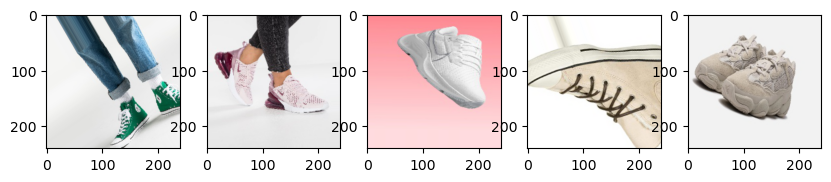

In [16]:
# print augmented image
plt.figure(figsize=(10, 10))
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.show()

## Create a model
Two model will create and train. For the **model2**, layers will be more than **model1**. <br>

In [17]:
from tensorflow.keras import layers

In [18]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channel)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 215296)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)

In [21]:
# Compile the neural network
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Fit the neural network
model_hist = model.fit(train_data, epochs=200, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=(len(test_data)))
print('Model accuracy: {:.4f}'.format(model_hist.history['accuracy'][-1]*100), '%')

Epoch 1/200
23/23 [==============================] - 22s 907ms/step - loss: 6.3237 - accuracy: 0.3460 - val_loss: 1.0936 - val_accuracy: 0.3333
Epoch 2/200
23/23 [==============================] - 21s 905ms/step - loss: 1.0863 - accuracy: 0.3727 - val_loss: 1.0795 - val_accuracy: 0.4035
Epoch 3/200
23/23 [==============================] - 20s 848ms/step - loss: 1.0798 - accuracy: 0.3488 - val_loss: 1.0824 - val_accuracy: 0.3596
Epoch 4/200
23/23 [==============================] - 19s 797ms/step - loss: 1.0764 - accuracy: 0.3910 - val_loss: 1.0843 - val_accuracy: 0.3596
Epoch 5/200
23/23 [==============================] - 19s 803ms/step - loss: 1.0738 - accuracy: 0.3896 - val_loss: 1.0718 - val_accuracy: 0.4035
Epoch 6/200
23/23 [==============================] - 19s 798ms/step - loss: 1.0755 - accuracy: 0.3952 - val_loss: 1.0740 - val_accuracy: 0.3947
Epoch 7/200
23/23 [==============================] - 18s 794ms/step - loss: 1.0758 - accuracy: 0.3812 - val_loss: 1.0744 - val_accuracy:

In [23]:
# save the model after training
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [24]:
model2 = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channel)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.02),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.02),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.02),
    layers.Dense(3, activation='softmax')
])

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 32)       

In [26]:
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model2_hist = model2.fit(train_data, epochs=200, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=(len(test_data)))
print('Model accuracy: {:.4f}'.format(model2_hist.history['accuracy'][-1]*100), '%')

Epoch 1/200
23/23 [==============================] - 18s 743ms/step - loss: 1.1665 - accuracy: 0.3263 - val_loss: 1.0928 - val_accuracy: 0.3772
Epoch 2/200
23/23 [==============================] - 17s 710ms/step - loss: 1.1000 - accuracy: 0.3615 - val_loss: 1.0949 - val_accuracy: 0.3596
Epoch 3/200
23/23 [==============================] - 16s 702ms/step - loss: 1.0926 - accuracy: 0.3769 - val_loss: 1.0833 - val_accuracy: 0.3772
Epoch 4/200
23/23 [==============================] - 16s 703ms/step - loss: 1.0823 - accuracy: 0.3643 - val_loss: 1.0738 - val_accuracy: 0.3947
Epoch 5/200
23/23 [==============================] - 16s 698ms/step - loss: 1.0816 - accuracy: 0.3685 - val_loss: 1.0715 - val_accuracy: 0.3772
Epoch 6/200
23/23 [==============================] - 16s 701ms/step - loss: 1.0722 - accuracy: 0.3699 - val_loss: 1.0646 - val_accuracy: 0.4123
Epoch 7/200
23/23 [==============================] - 16s 697ms/step - loss: 1.0681 - accuracy: 0.3994 - val_loss: 1.0580 - val_accuracy:

In [28]:
model.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


## Model Evaluation

In [29]:
# Function plot the loss and accuracy curves for training and validation
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, train_loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Model Training and Validation Loss')
  plt.ylabel('Loss')
  plt.legend()
  plt.figure()

  # Plot accuracy
  plt.plot(epochs, train_accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label='Validation accuracy')
  plt.title('Model Training and Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.legend();

### Model1 Evaluation

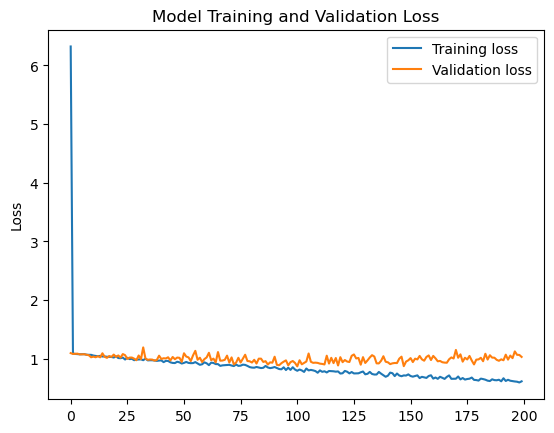

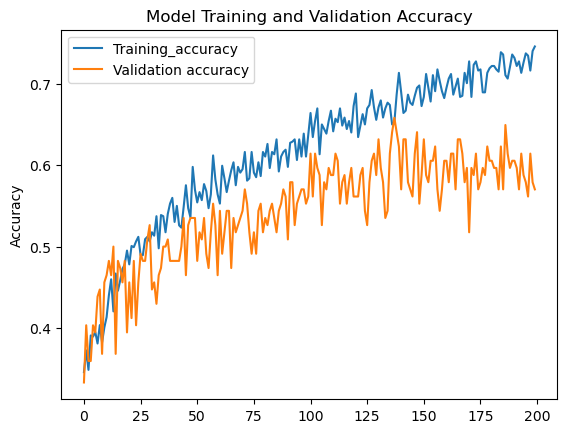

In [30]:
# Plot model1 loss curves
plot_loss_curves(model_hist)

### Model2 Evaluation

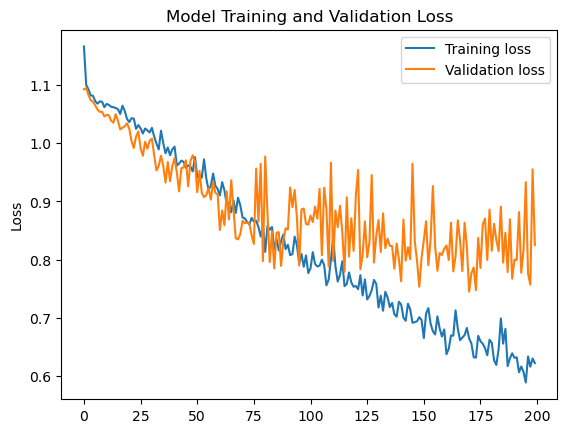

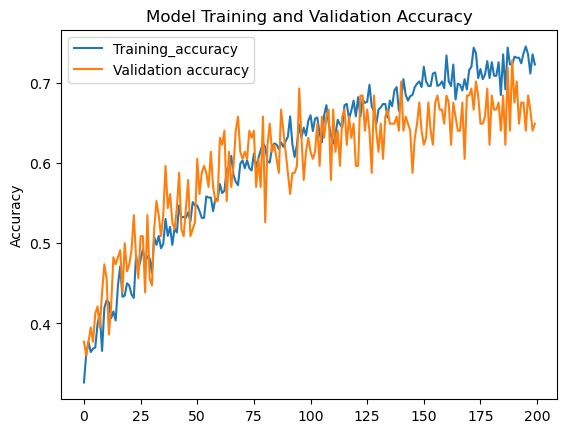

In [31]:
# Plot model2 loss curves
plot_loss_curves(model2_hist)

### Model1 Confusion Matrix

4/4 [==============================] - 1s 110ms/step


<AxesSubplot:>

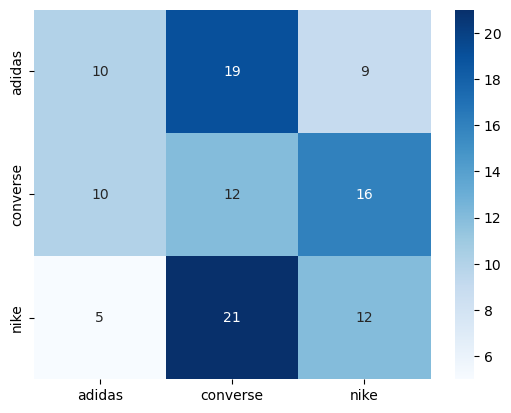

In [32]:
# cofusion matrix
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_data.classes, np.argmax(model.predict(test_data), axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=test_class, yticklabels=test_class) # make it pretty

### Model2 Confusion Matrix

4/4 [==============================] - 0s 92ms/step


<AxesSubplot:>

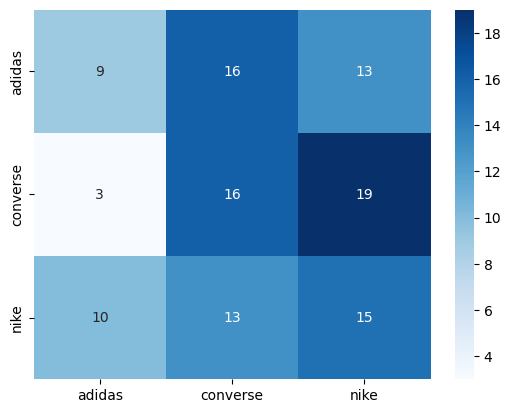

In [33]:
cm2 = confusion_matrix(test_data.classes, np.argmax(model2.predict(test_data), axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',xticklabels=test_class, yticklabels=test_class) # make it pretty

Model tend to predict shoes as converse and nike. <br>

## Transfer learning
Use pretrained model VGG16 and ResNet50 to improve accuracy

In [51]:
# transfer learning
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(img_height, img_width, channel), include_top=False)

In [52]:
# freeze layers
frozen_layers = 16
for layer in base_model.layers[:frozen_layers]:
    layer.trainable = False

In [53]:
# Add new layers
transfer_model = tf.keras.models.Sequential([base_model,
                                                layers.Flatten(),
                                                layers.Dense(128, activation='relu'), 
                                                layers.Dense(3, activation='softmax')])

In [105]:
transfer_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               3211392   
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                                 
Total params: 17,926,467
Trainable params: 7,931,395
Non-trainable params: 9,995,072
_________________________________________________________________


In [55]:
transfer_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model_transfer_1_hist = transfer_model.fit(train_data, epochs=30, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=(len(test_data)))
print('Model accuracy: {:.4f}'.format(model_transfer_1_hist.history['accuracy'][-1]*100), '%')

Epoch 1/30
23/23 [==============================] - 57s 2s/step - loss: 1.1565 - accuracy: 0.3840 - val_loss: 1.0460 - val_accuracy: 0.3947
Epoch 2/30
23/23 [==============================] - 58s 3s/step - loss: 0.8437 - accuracy: 0.6259 - val_loss: 0.6280 - val_accuracy: 0.7281
Epoch 3/30
23/23 [==============================] - 60s 3s/step - loss: 0.7484 - accuracy: 0.6695 - val_loss: 0.6076 - val_accuracy: 0.7895
Epoch 4/30
23/23 [==============================] - 61s 3s/step - loss: 0.6398 - accuracy: 0.7342 - val_loss: 0.6180 - val_accuracy: 0.7456
Epoch 5/30
23/23 [==============================] - 59s 3s/step - loss: 0.5419 - accuracy: 0.7834 - val_loss: 0.6145 - val_accuracy: 0.7632
Epoch 6/30
23/23 [==============================] - 58s 2s/step - loss: 0.4693 - accuracy: 0.8003 - val_loss: 0.4788 - val_accuracy: 0.8596
Epoch 7/30
23/23 [==============================] - 59s 3s/step - loss: 0.4582 - accuracy: 0.8129 - val_loss: 0.4558 - val_accuracy: 0.8421
Epoch 8/30
23/23 [==

In [57]:
# Save the model
model.save('model_transfer_1') 

INFO:tensorflow:Assets written to: model_transfer_1\assets


INFO:tensorflow:Assets written to: model_transfer_1\assets


Use pretrained model ResNet50 from TesorFlow to improve accuracy

In [99]:
# transfer learning using ResNet50
from tensorflow.keras.applications import ResNet50

base_model_restnet = ResNet50(input_shape=(img_height, img_width, channel), include_top=False)


In [100]:
# freeze layers
frozen_layers = 45
for layer in base_model_restnet.layers[:frozen_layers]:
    layer.trainable = False
    

In [106]:
model_transfer_2 = tf.keras.models.Sequential([base_model_restnet,
                                                layers.Flatten(),
                                                layers.Dense(128, activation='relu'),
                                                layers.Dense(3, activation='softmax')])

In [107]:
model_transfer_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_19 (Flatten)        (None, 131072)            0         
                                                                 
 dense_38 (Dense)            (None, 128)               16777344  
                                                                 
 dense_39 (Dense)            (None, 3)                 387       
                                                                 
Total params: 40,365,443
Trainable params: 39,904,515
Non-trainable params: 460,928
_________________________________________________________________


In [108]:
model_transfer_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
model_transfer_2_hist = model_transfer_2.fit(train_data, epochs=30, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=(len(test_data)))
print('Model accuracy: {:.4f}'.format(model_transfer_2_hist.history['accuracy'][-1]*100), '%')

Epoch 1/30
23/23 [==============================] - 98s 4s/step - loss: 2.4057 - accuracy: 0.3938 - val_loss: 1.1362 - val_accuracy: 0.3333
Epoch 2/30
23/23 [==============================] - 94s 4s/step - loss: 1.0273 - accuracy: 0.4684 - val_loss: 1.1615 - val_accuracy: 0.3333
Epoch 3/30
23/23 [==============================] - 92s 4s/step - loss: 1.0147 - accuracy: 0.4754 - val_loss: 1.0985 - val_accuracy: 0.3246
Epoch 4/30
23/23 [==============================] - 92s 4s/step - loss: 0.9987 - accuracy: 0.4979 - val_loss: 1.0971 - val_accuracy: 0.3421
Epoch 5/30
23/23 [==============================] - 91s 4s/step - loss: 0.9921 - accuracy: 0.4923 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 6/30
23/23 [==============================] - 91s 4s/step - loss: 0.9477 - accuracy: 0.5218 - val_loss: 1.0849 - val_accuracy: 0.3772
Epoch 7/30
23/23 [==============================] - 91s 4s/step - loss: 0.9212 - accuracy: 0.5612 - val_loss: 1.0288 - val_accuracy: 0.4912
Epoch 8/30
23/23 [==

In [110]:
# Save the model
model.save('model_transfer_2')

INFO:tensorflow:Assets written to: model_transfer_2\assets


INFO:tensorflow:Assets written to: model_transfer_2\assets


### VGG16 Evaluation

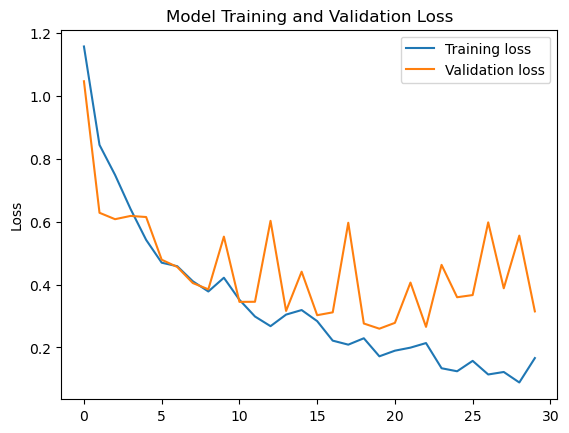

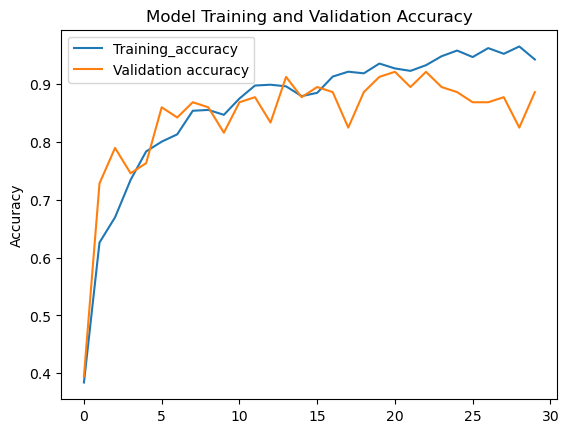

In [111]:
# VGG16 loss curves
plot_loss_curves(model_transfer_1_hist)

### VGG16 confusion matrix

4/4 [==============================] - 7s 2s/step


Text(50.722222222222214, 0.5, 'True')

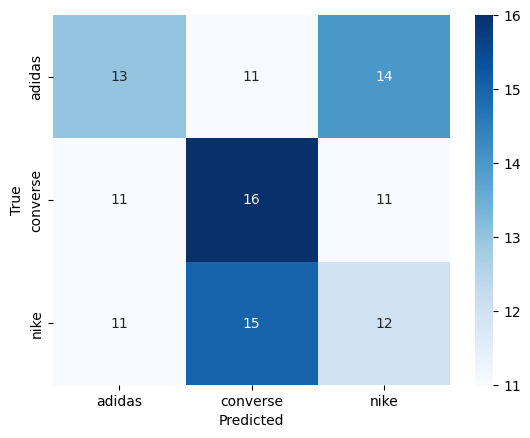

In [112]:
cm3 = confusion_matrix(test_data.classes, np.argmax(transfer_model.predict(test_data), axis=-1))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=test_class, yticklabels=test_class) # make it pretty
plt.xlabel('Predicted')
plt.ylabel('True')

### ResNet50 Evaluation

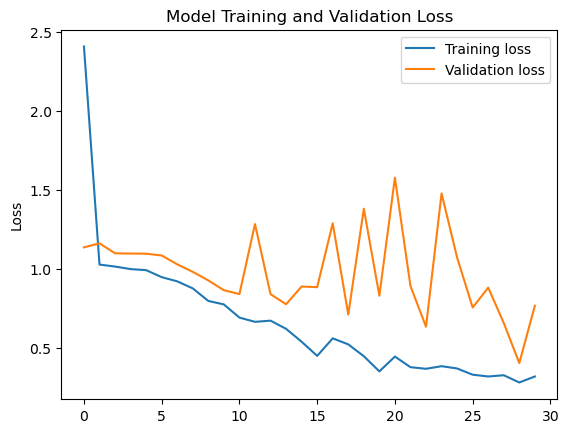

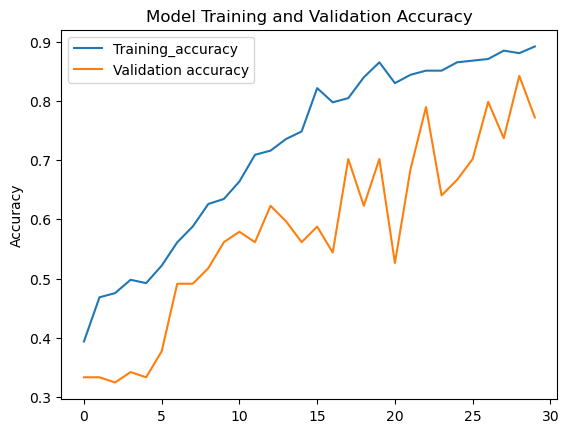

In [113]:
# ResNet50 loss curves
plot_loss_curves(model_transfer_2_hist)

### ResNet50 Confusion Matrix

4/4 [==============================] - 5s 1s/step


Text(50.722222222222214, 0.5, 'True')

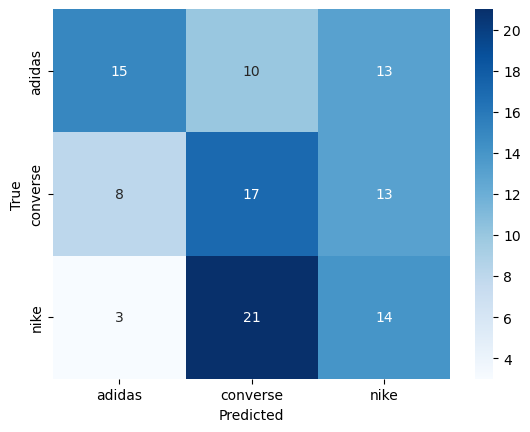

In [115]:
cm4 = confusion_matrix(test_data.classes, np.argmax(model_transfer_2.predict(test_data), axis=-1))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues',xticklabels=test_class, yticklabels=test_class) # make it pretty
plt.xlabel('Predicted')
plt.ylabel('True')

Model tend to predict shoes as converse and nike.

## Discussion

| Model | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |  Time |
| --- | --- | --- | --- | --- | --- |
| Model 1 | 0.7454 | 0.6125 | 0.5702 | 1.0288 | 58 mins |
| Model 2 |  0.7229 | 0.6128 | 0.6491 | 0.8248 | 56 mins |
| VGG16 | 0.9423 | 0.1662 | 0.8860 | 0.3146 | 30 mins |
| ResNet50 | 0.8917 | 0.3200 | 0.7719 | 0.7670 | 46 mins |<br>

Out of the 4 models, VGG16 has the best accuracy and loss. It took 30 mins to train the model. Model 1 and 2 has similar accuracy and loss, but Model 2 took less time to train. ResNet50 has the second highest accuracy but it took 46 mins to train the model. <br>

- Model 1: train and validation curves are improving but there is a gap between them training and validation loss is increasing. This is a sign of overfitting if train further.<br>
- Model 2: training loss is a lot lower than validation loss, which means the model is overfitting. To solve this problem, we can add more data or increase dropout rate. <br>
- VGG16: training and validation curves are improving and there start to converge after around 20 epoch.  
- RenNet50: train and validation curves are improving but there is a gap between them training and validation loss is increasing. This is a sign of overfitting if train further.<br>

## Testing model with image found on Google

In [116]:
# function to test the mode on a random image

from tensorflow.keras.preprocessing import image

def predict(img_rel_path, model):
    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    # Import Image from the path with size of img_height and img_width
    img = image.load_img(img_rel_path, target_size=(img_height, img_width))

    # Convert image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the loaded Image
    plt.axis('off')
    plt.imshow(img.squeeze()) # Squeeze to remove single-dimensional entries from the shape of an array.
    plt.show()

    # Get the predicted label for the loaded Image
    p = model.predict(img[np.newaxis, ...]) 

    # print("\nMaximum Probability: ", np.max(p[0], axis=-1))
    # print('\nMaximum Probability: {:.4f} %'.format(np.max(p[0]*100), axis=-1))
    print('\nMaximum Probability: {:.4f} %'.format(np.max(p[0]*100)))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print('Classified:', predicted_class,'\n')

### VGG16

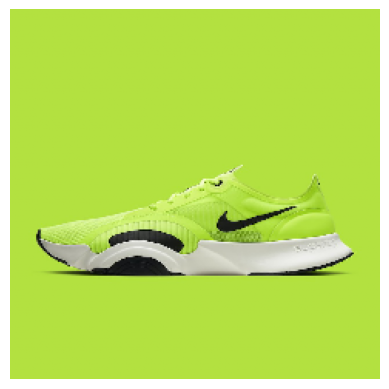

1/1 [==============================] - 0s 187ms/step

Maximum Probability: 98.7138 %
Classified: nike 



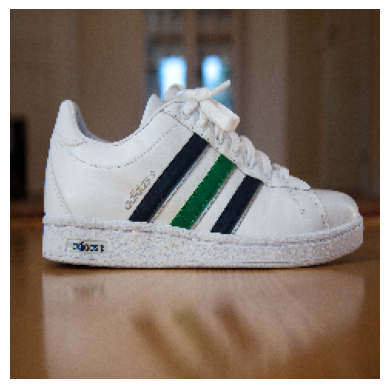

1/1 [==============================] - 0s 111ms/step

Maximum Probability: 99.9516 %
Classified: adidas 



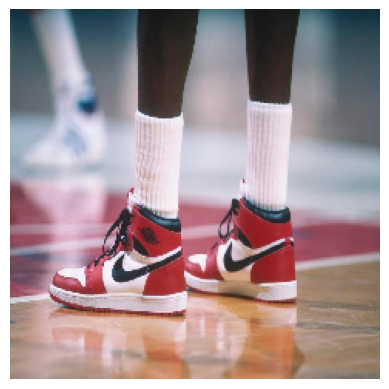

1/1 [==============================] - 0s 89ms/step

Maximum Probability: 88.4436 %
Classified: nike 



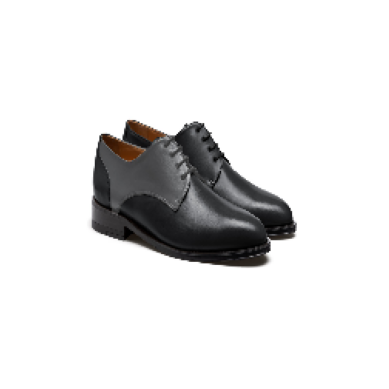

1/1 [==============================] - 0s 96ms/step

Maximum Probability: 98.4742 %
Classified: nike 



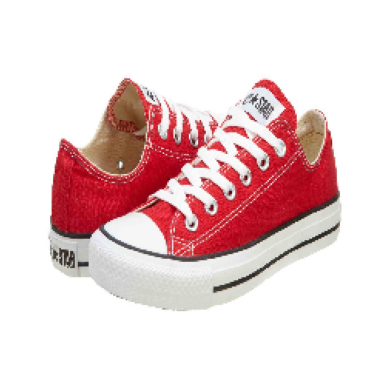

1/1 [==============================] - 0s 90ms/step

Maximum Probability: 100.0000 %
Classified: converse 



In [117]:
predict('../NNDL_Project/01.jpg', transfer_model)
predict('../NNDL_Project/02.jpg', transfer_model)
predict('../NNDL_Project/03.jpg', transfer_model)
predict('../NNDL_Project/04.jpg', transfer_model)
predict('../NNDL_Project/05.jpg', transfer_model)

### Model1

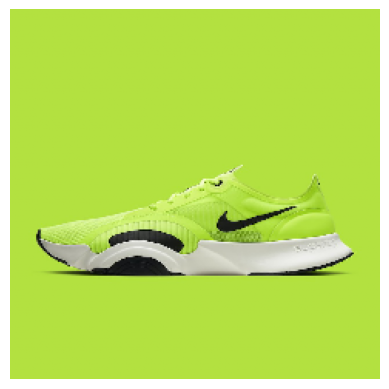

1/1 [==============================] - 0s 62ms/step

Maximum Probability: 100.0000 %
Classified: nike 



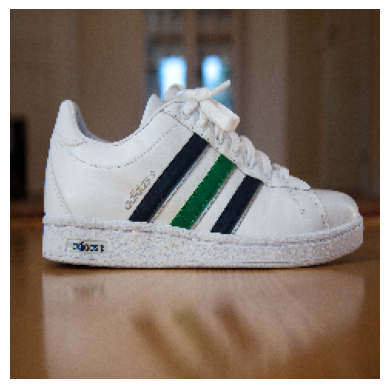

1/1 [==============================] - 0s 26ms/step

Maximum Probability: 53.4447 %
Classified: converse 



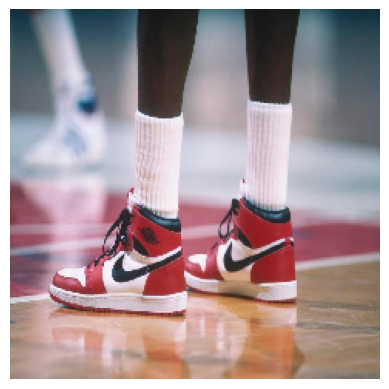

1/1 [==============================] - 0s 29ms/step

Maximum Probability: 62.5657 %
Classified: converse 



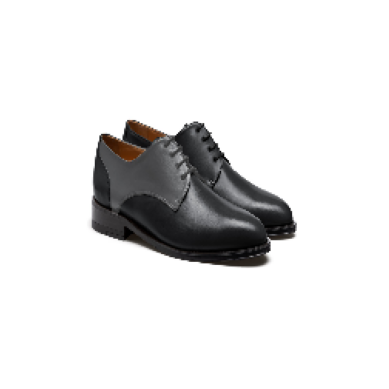

1/1 [==============================] - 0s 28ms/step

Maximum Probability: 47.2180 %
Classified: adidas 



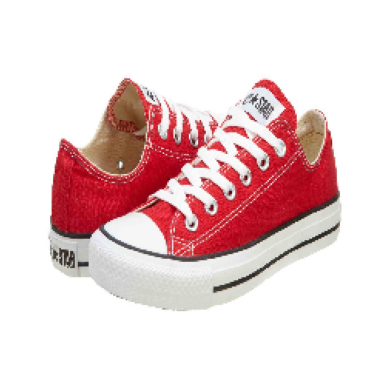

1/1 [==============================] - 0s 31ms/step

Maximum Probability: 80.4719 %
Classified: converse 



In [118]:
predict('../NNDL_Project/01.jpg', model)
predict('../NNDL_Project/02.jpg', model)
predict('../NNDL_Project/03.jpg', model)
predict('../NNDL_Project/04.jpg', model)
predict('../NNDL_Project/05.jpg', model)

### Model2

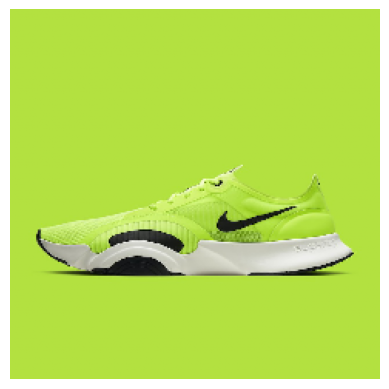

1/1 [==============================] - 0s 67ms/step

Maximum Probability: 99.9989 %
Classified: nike 



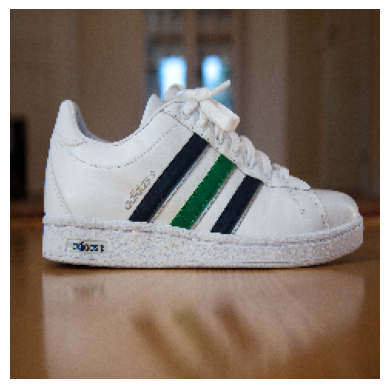

1/1 [==============================] - 0s 22ms/step

Maximum Probability: 68.3279 %
Classified: adidas 



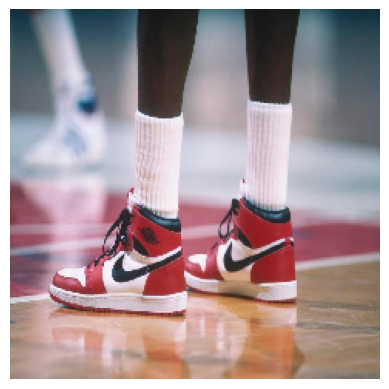

1/1 [==============================] - 0s 23ms/step

Maximum Probability: 62.7399 %
Classified: nike 



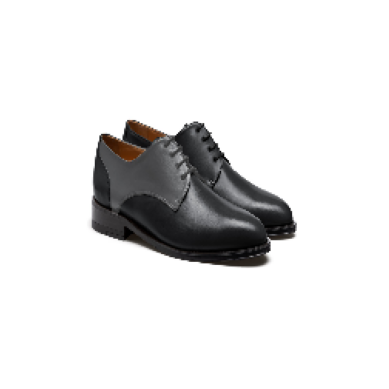

1/1 [==============================] - 0s 21ms/step

Maximum Probability: 58.7111 %
Classified: nike 



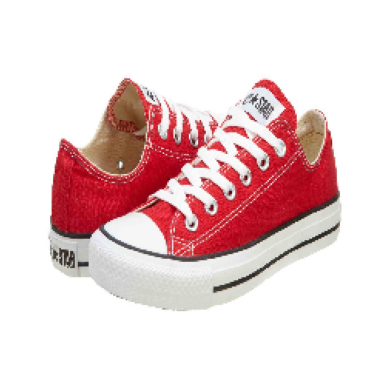

1/1 [==============================] - 0s 21ms/step

Maximum Probability: 83.4511 %
Classified: converse 



In [119]:
predict('../NNDL_Project/01.jpg', model2)
predict('../NNDL_Project/02.jpg', model2)
predict('../NNDL_Project/03.jpg', model2)
predict('../NNDL_Project/04.jpg', model2)
predict('../NNDL_Project/05.jpg', model2)

### ResNet50

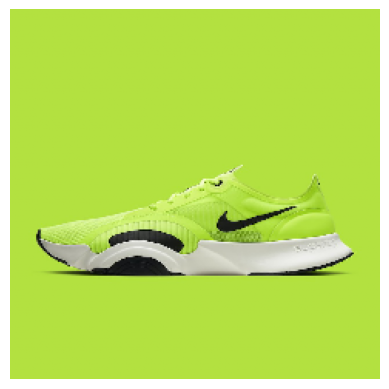

1/1 [==============================] - 1s 715ms/step

Maximum Probability: 54.5283 %
Classified: converse 



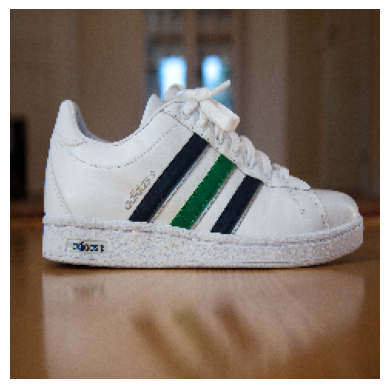

1/1 [==============================] - 0s 80ms/step

Maximum Probability: 99.8807 %
Classified: adidas 



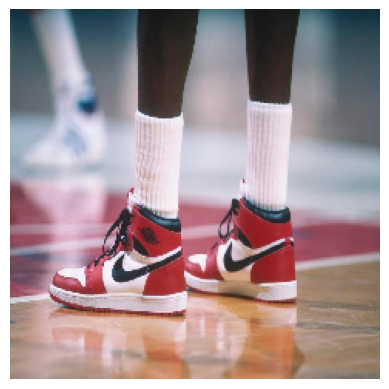

1/1 [==============================] - 0s 76ms/step

Maximum Probability: 94.2698 %
Classified: nike 



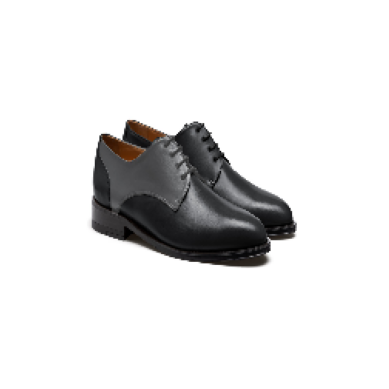

1/1 [==============================] - 0s 78ms/step

Maximum Probability: 51.5016 %
Classified: adidas 



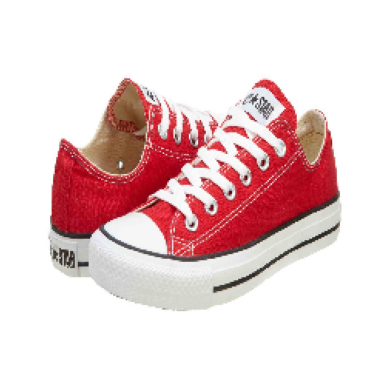

1/1 [==============================] - 0s 77ms/step

Maximum Probability: 100.0000 %
Classified: converse 



In [120]:
predict('../NNDL_Project/01.jpg', model_transfer_2)
predict('../NNDL_Project/02.jpg', model_transfer_2)
predict('../NNDL_Project/03.jpg', model_transfer_2)
predict('../NNDL_Project/04.jpg', model_transfer_2)
predict('../NNDL_Project/05.jpg', model_transfer_2)

## Conclusion
Because it took less time to train the model. We will use VGG16 to classify the image. It can classify the image with 82% accuracy, compare to the other model, it has the best accuracy. If we want to improve the accuracy, we can try other model or increase the number of epoch. Right now, the model can only identify 3 brand of shoes, if we want to identify more brand, we can add more images to the dataset and train the model again. If we wan to identify shoes that people wear, we can use object detection and segmentation to identify the shoes and classify the image. <br>

By using this model, we can identify the brand of shoes that people post on their social media site, and use the result for maketing purpose, such as to identify the brand that people like the most and use it to create new design of shoes. Or using this model for automatic tagging of shoes image, so that people can search for shoes image by brand. <br>

## References
https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged<br>
https://github.com/features/copilot<br>
https://neurohive.io/en/popular-networks/vgg16/<br>
https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50<br>
https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16<br>